## 데이터 불러오기
- 각 tutor의 클래스별 학생들의 점수를 나열한 것
- A(N=15) & B(N=18)

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


## 데이터 요약
- 각 클래스 학생들의 데이터 분포 요약
- groupby : 평균, 표준편차, 몇명.

In [ ]:
df.groupby('tutor')['grade'].agg(['mean', 'std', 'count']).reset_index()

,tutor,mean,std,count
0,Anastasia,74.533333,8.998942,15
1,Bernadette,69.055556,5.774918,18


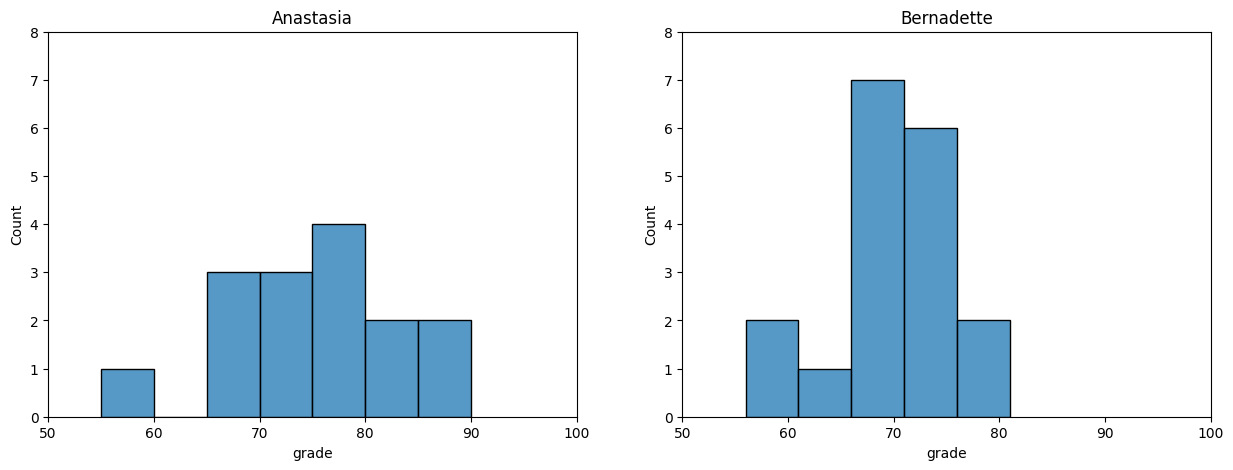

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade']).reset_index(drop=True)
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade']).reset_index(drop=True)
sns.histplot(Anastasia['grade'], ax = axes[0], binwidth=5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth=5)

axes[0].set_xlim(50,100) # x축 설정
axes[1].set_xlim(50,100) # x축 설정

axes[0].set_ylim(0,8) # y축 설정
axes[1].set_ylim(0,8) # y축 설정

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

plt.show()

### pointplot()
- 두 그룹의 학생에 대한 평균과 해당 신뢰구간을 보여준다.

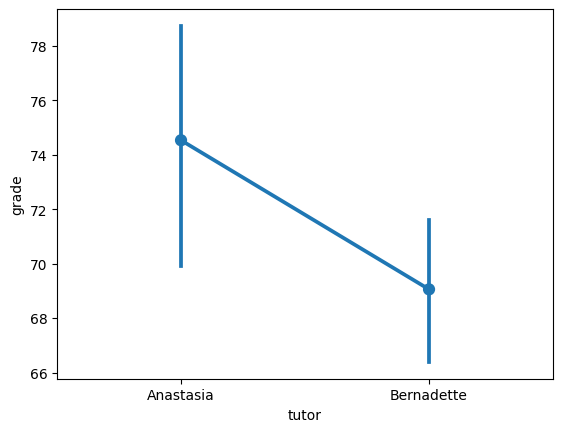

In [ ]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)
plt.show()

In [ ]:
!pip install --upgrade pingouin

## 독립표본 T-검정
- 절차 1 : 정규성 검정
- 절차 2 : 등분산성 검정
- 절차 3 : ttest  

In [ ]:
import pingouin as pg
pg.normality(df, dv="grade", group='tutor')

,W,pval,normal
tutor,,,
Anastasia,0.981857,0.980597,True
Bernadette,0.969075,0.780127,True


In [ ]:
# 등분산성 검정
pg.homoscedasticity(data = df, dv = 'grade', group='tutor')

,W,pval,equal_var
levene,2.128701,0.154622,True


In [ ]:
# ttest
from pingouin import ttest
ttest(Anastasia['grade'], Bernadette['grade'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


## 문제
- 주어진 데이터(data/toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다.  오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다. 가설은 아래와 같다.
1. 각 그룹에 대한 표본평균을 구한다.
2. 귀무가설, 대립가설을 설정하세요.
3. 정규성 검정, 등분산성 검정 코드를 작성하시고, 결과를 해석하세요.
4. t-test 진행하고, t-통계량, p-value 구하세요.
5. 가설검정의 결과를 귀무가설을 기준으로 채택/기각 여부를 판단 내려주세요.
6. 조건 : pingouin 라이브러리 사용 안함, scipy 라이브러리만 사용.
---> 40분까지 개별적으로 .ipynb 파일을 제출(Slack)

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/Python 데이터 분석 라이브러리_20220806/Statistics/'
df = pd.read_csv(DATA_PATH + "/data/toothgrowth.csv")
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [ ]:
df.groupby('supp')['len'].agg(['mean', 'std', 'count']).reset_index()

,supp,mean,std,count
0,OJ,20.663333,6.605561,30
1,VC,16.963333,8.266029,30


2. 귀무가설, 대립가설을 설정하세요.
- 귀무가설 : 투여한 약제별(OJ, VC)의 평균 치아의 길이는 같다.
- 대립가설 : 투여한 약제별(OJ, VC)의 평균 치아의 길이는 같지 않다.

3. 정규성 검정, 등분산성 검정 코드를 작성하시고, 결과를 해석하세요.
- 첫번째 질문 : 정규성 검정 해야 할까요? 말아야 할까요?

- 두번째 질문 등분산성 검정

In [ ]:
from scipy import stats
stats.levene(df.loc[df['supp'] == 'VC', 'len'], df.loc[df['supp'] == 'OJ', 'len'])

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

- p.val = 0.27
- 귀무가설 : 두 그룹은 분산의 차이가 없다 ==> 분산의 동질성 만족

In [ ]:
from scipy.stats import stats

t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == 'VC', 'len'],
                                   df.loc[df['supp'] == 'OJ', 'len'],
                                   equal_var = True)

<ipython-input-22-cb24a4e5dfbd>:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_ind(df.loc[df['supp'] == 'VC', 'len'],


In [ ]:
t_score, p_value

(-1.91526826869527, 0.06039337122412849)

- 두 그룹간에 평균 차이 없음!
- 두 그룹간에 유의미하게 평균 차이가 있다고 보기가 통계적으로는 어렵습니다!

## 대응표본
- 체중 측정
- 식단 운동 프로그램
 + 편의점, 2000원 커피 음료(당류)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [ ]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


## 데이터 시각화

(41.46, 73.14)


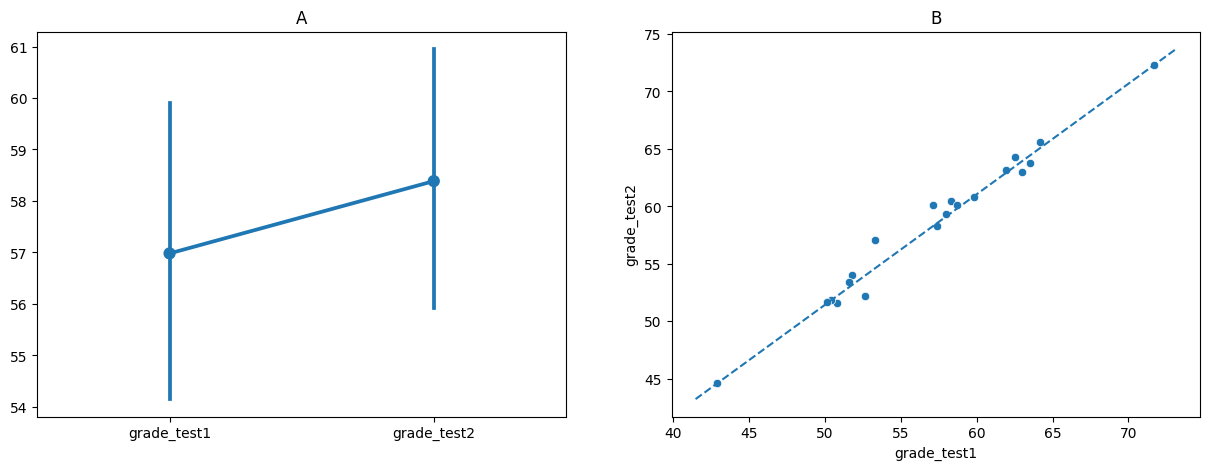

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(data = df, ax=ax[0])
sns.scatterplot(data = df, x ='grade_test1', y = 'grade_test2', ax = ax[1])
print(ax[1].get_xlim())
ax[1].plot(ax[1].get_xlim(), ax[1].get_ylim(), ls = '--')

ax[0].set_title("A")
ax[1].set_title("B")
plt.show()

### 데이터 가공
- 실험 전후 차이를 보기 위해

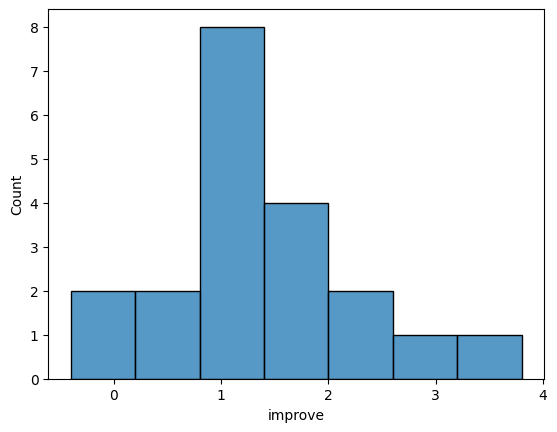

In [ ]:
df2 = df.copy()
df2['improve'] = df2['grade_test2'] - df2['grade_test1']

sns.histplot(data = df2, x = 'improve')
plt.show()

In [ ]:
## pingouin 라이브러리 활용하셔서 정규성검정
import pingouin as pg
pg.normality(df2['improve'])

,W,pval,normal
improve,0.966399,0.677769,True


In [ ]:
from pingouin import ttest
ttest(df2['grade_test2'], df2['grade_test1'], paired=True) # 대응표본 검정을 하겠다.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/Python 데이터 분석 라이브러리_20220806/Statistics/'
df = pd.read_csv(DATA_PATH + "/data/insectsprays.csv")
df.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   before_spr  36 non-null     int64
 1   after_spr   36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


-12.0
정규성 ShapiroResult(statistic=0.9238725900650024, pvalue=0.016382716596126556)
-14.893263274163433
1.0227956957398466e-16
기각


<ipython-input-50-3fdf30a877fb>:14: DeprecationWarning: Please use `ttest_rel` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])


<Axes: >

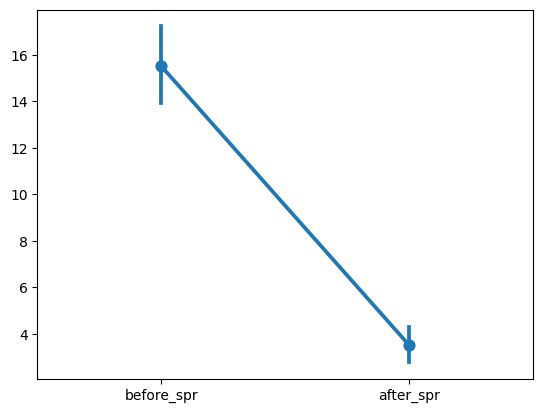

In [50]:
# - 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
diff = df['after_spr'] - df['before_spr']
print(diff.mean())
# - 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
# 귀무가설 : 살충제 전후의 평균은 0이다.
# 대립가설 : 살충제 전후의 평균은 0이 아니다.
from scipy.stats import shapiro
print("정규성", shapiro(diff)) #

# - 문제 3. 정규성을 확인한다.
# - 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.

from scipy.stats import stats
t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])
print(t_score)
print(p_value)

# - 문제 5. 귀무가설 채택/기각 여부를 확인한다.
if p_value >= 0.05:
  print("채택")
else:
  print("기각")

# - 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.
import seaborn as sns
sns.pointplot(data=df)